# Introdução ao Modelo ARIMA (Autoregressive Integrated Moving Average Model)

## Sobre o ARIMA
ARIMA é a acrônimo que significa "Autoregressive Integrated Moving Average Model" (Modelo de médias móveis integrado de auto regressivo).

Esse acrônimo é descritivo, capturando os aspectos chave do próprio modelo. Resumidamente, estes são:

* AR: Auto regressão. Um modelo que utiliza a relação de dependência entre uma observação e um conjunto de observações passadas.
* I: Integrated. O uso de diferenças das obervações para tornar uma série estacionária.
* MA: Média móvel. Um modelo que usa a dependência entre uma observação e o erro residual das média móveis aplicadas em observações anteriores. 

Cada um desses componentes são explicitamente especificados no modelo através de parâmetros. Uma notação padrão é utilizada como ARIMA(p, d, q), onde os parâmetros são substituidos por valores inteiros para indicar o modelo ARIMA específico que está sendo utilizado. 

Os parâmetros do modelo ARIMA são definidos como:

* p: o número de observações passadas inclusas no modelo, também chamado de "ordem do lag".
* d: o número de diferenças tomadas, também chamado de "grau de diferenciação"
* q: o tamanho da janela da média móvel, também chamado de "ordem da média móvel"

O valor 0 pode ser utilizado como parâmetro, indicando que o elemento não será utilizado. Dessa forma, o modelo ARIMA pode ser configurado como um modelo ARMA, ou até mesmo um simples modelo AR, I, ou MA.

## ARIMA com python/pandas
Para trabalharmos com o modelo ARIMA utilizaremos a base de dados "shampoo.csv", contendo o histório de vendas de shampoo de uma empresa qualquer.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
shampoo = pd.read_csv('shampoo.csv')

In [34]:
shampoo.Month = pd.to_datetime(shampoo.Month)

In [35]:
shampoo.set_index('Month', inplace=True)

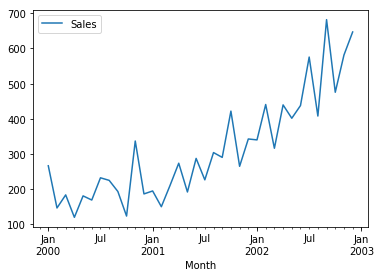

In [36]:
shampoo.plot()

Percebemos que as vendas de shampoo possuem uma tendência clara.

Isso sugere que a série temporal não é estacionária e necessitará de diferenças para torná-la estacionária. Pelo menos uma ordem de diferenciação de 1.

Vamos dar uma olhada no gráfico de autocorrelação da série temporal. Para tanto, utilizaremos uma função do pandas.

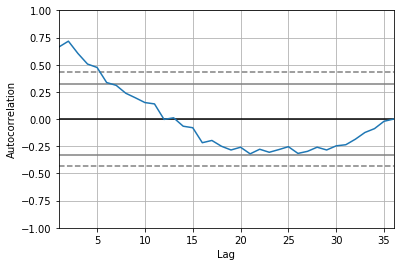

In [37]:
pd.plotting.autocorrelation_plot(shampoo)

Rodando o exemplo, podemos ver que existe uma correlação positiva com os 12 primeiros lags que é significativo para os 5 primeiros.

Um bom ponto de partida para o parâmetro do AR poderia ser o valor de 5.

Faremos agora a importação do modelo ARIMA para construção do modelo preditivo.

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model = ARIMA(shampoo, order=(5,1,0))
model_fit = model.fit(disp=0)

/home/ronaldo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ronaldo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
residuals = pd.DataFrame(model_fit.resid)
residuals.describe()

,0
count,35.000000
mean,-5.495218
std,68.132882
min,-133.296637
25%,-42.477890
50%,-7.186512
75%,24.748330
max,133.237936


## Previsão móvel com modelo ARIMA


O modelo ARIMA pode ser utilizado para fazer previsões futuras.

Podemos utilizar a função forcast() para fazer previsões. O resultado da função é a previsão do próximo período com seu valor esperado, desvio padrão e intervalo de confiança.

In [54]:
output = model_fit.forecast()

In [61]:
output

(array([564.21353606]),
 array([64.24141928]),
 array([[438.30266796, 690.12440416]]))

Nesse caso, a previsão para o peíodo de 2003-01 é de aproximadamente 564 unidades.